In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'archive/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

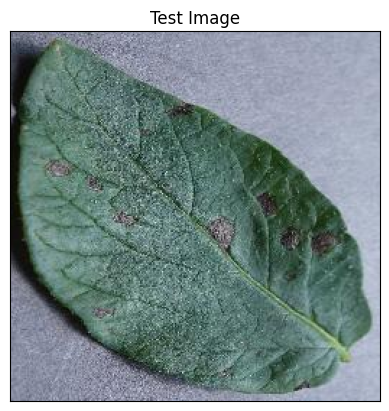

In [4]:
#Test Image Visualization
import cv2
image_path = 'archive/test/test/PotatoEarlyBlight3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [6]:
print(predictions)

[[5.64219290e-03 4.00815152e-05 1.06847030e-04 1.90664083e-01
  4.98423506e-05 1.78000286e-01 9.21321043e-06 2.65374128e-03
  5.79594671e-05 2.46355892e-04 1.07607447e-01 5.31258411e-06
  1.30526205e-05 5.61200686e-05 4.59609782e-06 3.63838117e-05
  5.08795492e-04 3.51421295e-05 3.59484193e-06 2.93219986e-04
  3.82009894e-03 6.28162408e-04 4.35977489e-01 2.94090918e-04
  4.99041378e-03 6.08016215e-02 7.33887573e-05 3.17299200e-05
  3.34899778e-06 4.21784993e-04 2.70447810e-04 6.09301357e-03
  2.02467781e-05 8.46379805e-07 1.35033450e-04 2.90545177e-05
  9.94026122e-05 2.75539147e-04]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


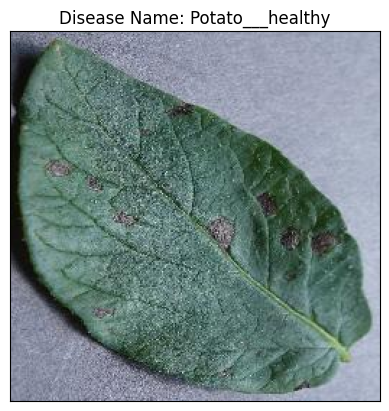

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
model_prediction

'Potato___healthy'

In [10]:
from tensorflow.keras.models import load_model

# Save the trained model
cnn.save('test_model.h5')